In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix, classification_report

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [13]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [14]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [15]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

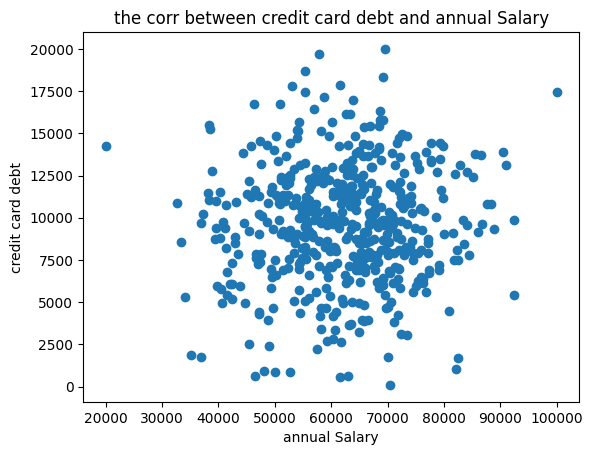

In [16]:
plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the corr between credit card debt and annual Salary')

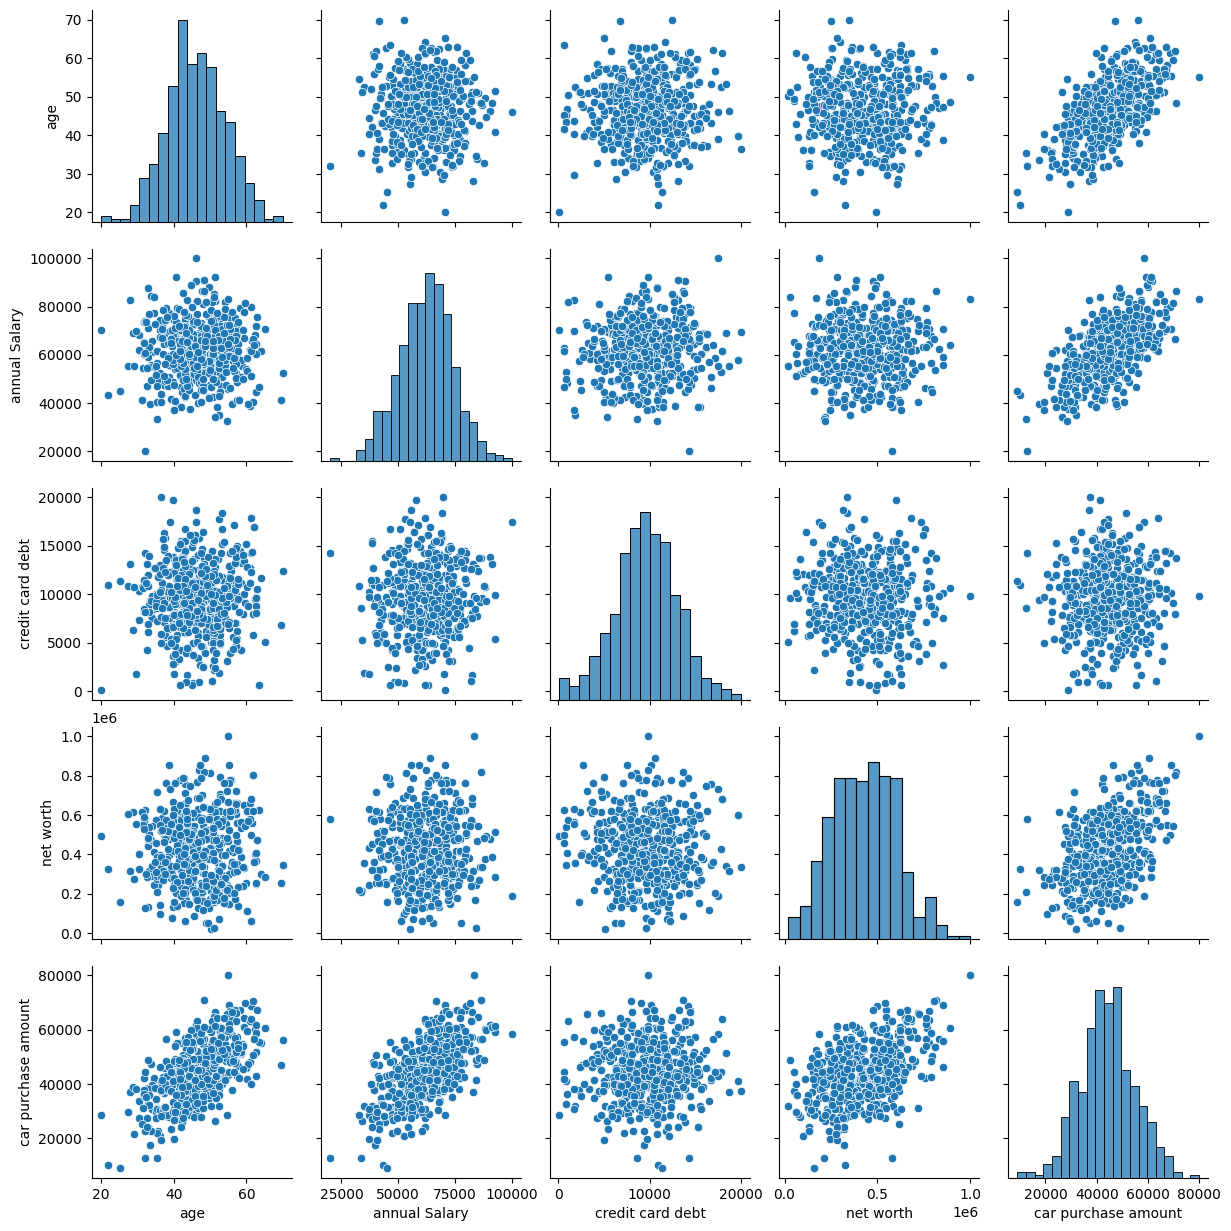

In [17]:
sns.pairplot(df)

In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [20]:
#Trying linear regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999822559963
Test score 0.9999999751011681


In [21]:
y_pred = lreg.predict(X_test)

In [22]:
ann = Sequential([Dense(32, activation="relu"),
                 Dense(1, activation='linear')])

ann.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])


history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
10/10 [==============================] - 1s 64ms/step - loss: 0.1248 - mean_absolute_error: 0.3286 - val_loss: 0.0767 - val_mean_absolute_error: 0.2496
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0436 - mean_absolute_error: 0.1793 - val_loss: 0.0242 - val_mean_absolute_error: 0.1258
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0900 - val_loss: 0.0105 - val_mean_absolute_error: 0.0835
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0775 - val_loss: 0.0104 - val_mean_absolute_error: 0.0840
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0807 - val_loss: 0.0097 - val_mean_absolute_error: 0.0808
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0739 - val_loss: 0.0089 - val_mean_absolute_error: 0.0772
Epoch 7/50
10/10 [=========

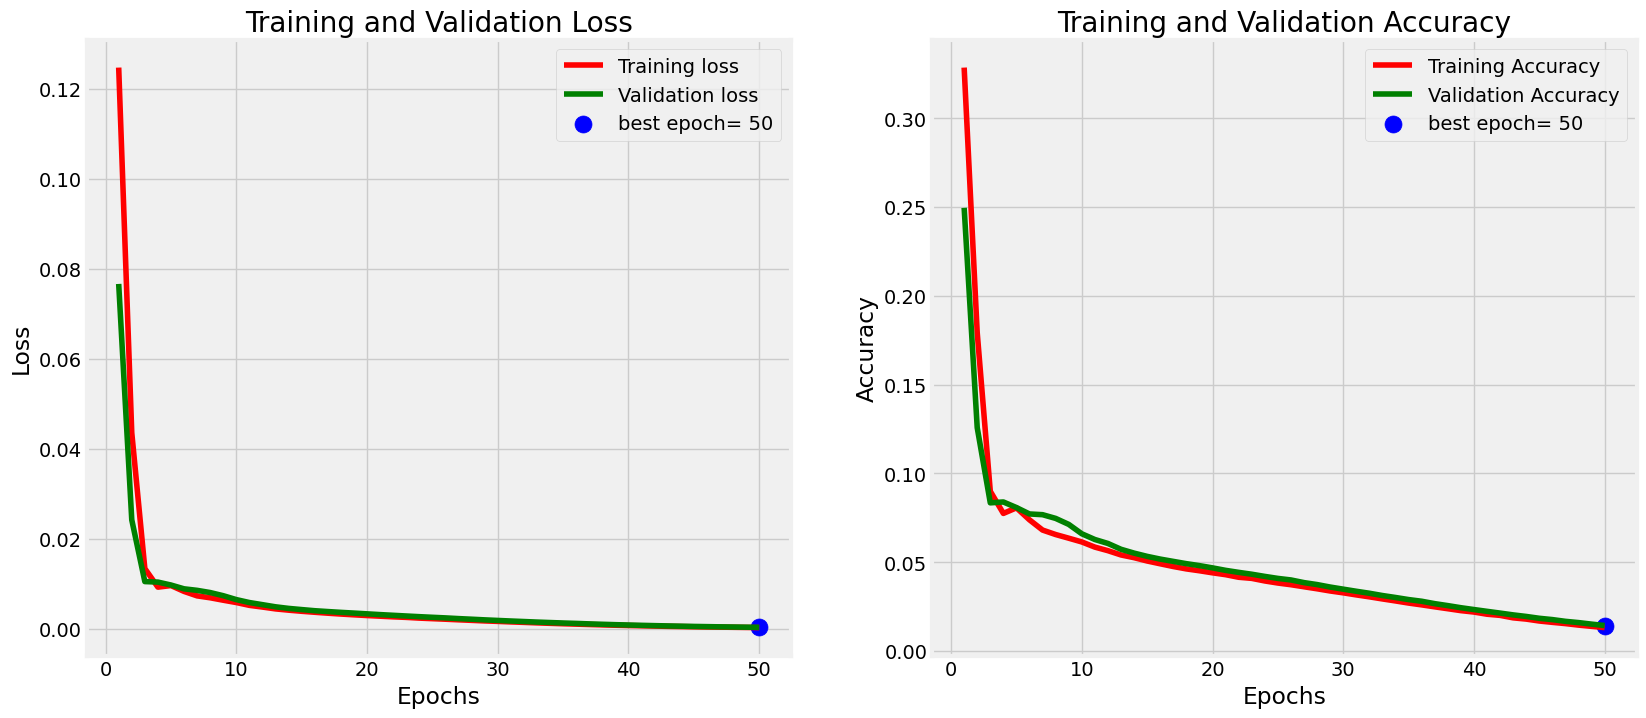

In [23]:
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [24]:
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [25]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9999999751011681


In [26]:
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.3774e-04 - mean_absolute_error: 0.0111


[0.00023774488363415003, 0.01109578087925911]

In [27]:
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 43ms/step


array([[191996.38]], dtype=float32)

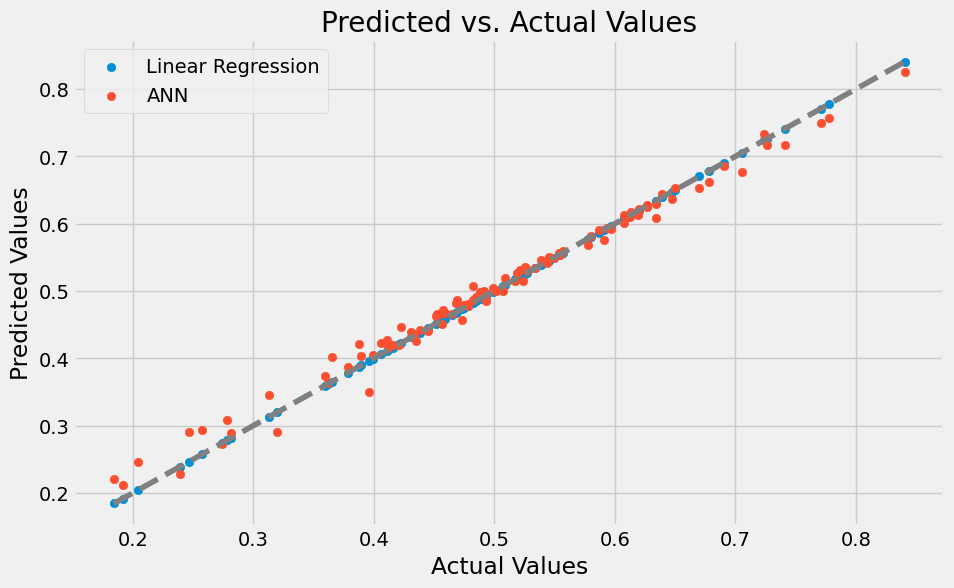

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, ann_y_pred, label='ANN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

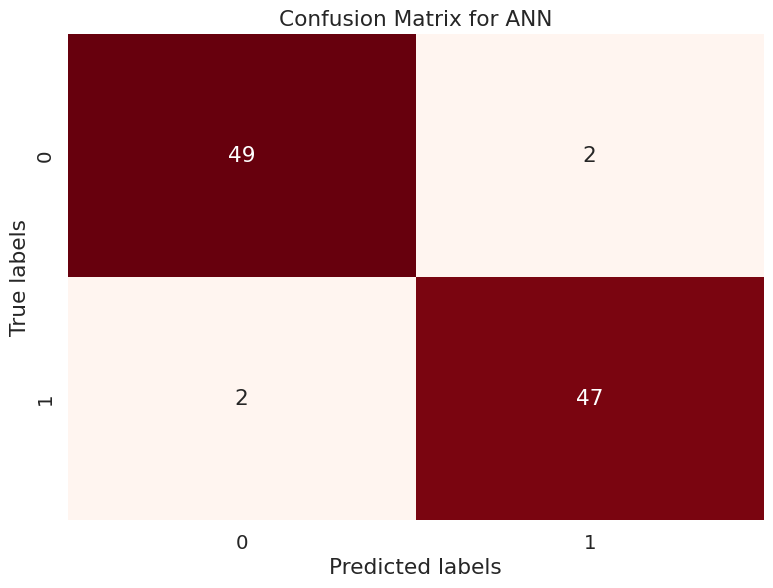

In [42]:
from sklearn.metrics import confusion_matrix

# Mengubah nilai prediksi menjadi biner (0 atau 1) berdasarkan threshold 0.5
binary_y_pred = [1 if pred >= 0.5 else 0 for pred in ann_y_pred]

# Confusion matrix
cm_ann = confusion_matrix(y_test.round(), binary_y_pred)

# Tampilan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for ANN')
plt.show()